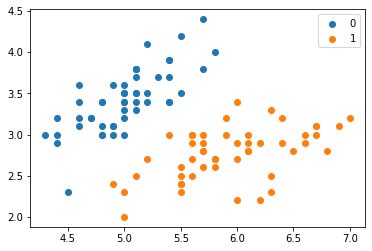

In [325]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0, 1, -1]])
    for i in range(len(data)):
        if data[i, -1] == 0:
            data[i, -1] = -1
    # print(data)
    return data[:, :2], data[:, -1]
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [326]:
print(X_test.shape)
print(y_train.shape)

(25, 2)
(75,)


In [327]:
#这里写三个核函数，linear,poly和guassian
def kernal(X,shape):
    e=np.exp(1)
    if (shape=="linear"):
        return np.dot(X,X.T)
    elif (shape=="poly"):
        return (np.dot(X,X.T)+1)**2
    elif (shape=="guassian"):
        sigma=1
        m,n = X.shape
        H=np.zeros((m,m))
        for i in range(m):
            for j in range(m):
                a= X[i]-X[j]
                H[i][j]=np.exp(-0.5 * float(a.dot(a.T)) / (sigma**2))
        return H
    else :
        return 0



In [328]:
def SVM01 (X,y,C,shape):
    #Initializing values and computing H. Note the 1. to force to float type
    m,n = X.shape
    y = y.reshape(-1,1) * 1.
    sum_y = np.dot(y,y.T)
    sum_X = kernal(X,shape)
    H= sum_X*sum_y
    P = cvxopt_matrix(H)
    q = cvxopt_matrix(-np.ones((m, 1)))
    G = cvxopt_matrix(-np.eye(m))
    h = cvxopt_matrix(np.zeros(m))
    A = cvxopt_matrix(y.reshape(1, -1))
    b = cvxopt_matrix(np.zeros(1))
    sol = cvxopt_solvers.qp(P,q,G,h,A,b)
    alphas = np.array(sol['x'])
    w = ((y*alphas).T @ X).reshape(-1,1)
    S = (alphas > 1e-4).flatten()
    b = y[S] - np.dot(X[S],w)
    return w,b

In [329]:
w,b= SVM01 (X_train,y_train,1,"linear")
print(w)
print(b[0])

     pcost       dcost       gap    pres   dres
 0: -1.4645e+01 -3.2218e+01  2e+02  1e+01  2e+00
 1: -2.6891e+01 -3.1967e+01  9e+01  5e+00  7e-01
 2: -5.0652e+01 -4.7207e+01  7e+01  3e+00  4e-01
 3: -3.7053e+01 -4.0379e+01  4e+01  1e+00  1e-01
 4: -3.3835e+01 -3.3899e+01  5e-01  1e-02  2e-03
 5: -3.3795e+01 -3.3796e+01  5e-03  1e-04  2e-05
 6: -3.3795e+01 -3.3795e+01  5e-05  1e-06  2e-07
 7: -3.3795e+01 -3.3795e+01  5e-07  1e-08  2e-09
Optimal solution found.
[[ 6.31578947]
 [-5.26315789]]
[-17.31578947]


In [330]:
# pred = np.sign(np.dot(X_test,w)-b[0])
# print(pred)
# for i in range(y_test.shape[0]):
#     score=0
#     if pred[i]==y_test[i]:
#         score +=1
# score /=y_test.shape[0]